In [1]:
import os
import sys
import pylab as pl
import numpy as np
import pandas as pd
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from getCitiBikeCSV import getCitiBikeCSV

In [3]:
datestring = '201503'
getCitiBikeCSV(datestring)

('Downloading', '201503')
file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [5]:
df['age'] = 2015 - df['birth year']

In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,28.0
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,47.0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,NaN
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,32.0
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,45.0


In [7]:
df['age'].dropna(inplace=True)

In [8]:
df.age.describe()

count    328973.000000
mean         39.706256
std          11.711420
min          16.000000
25%          30.000000
50%          38.000000
75%          48.000000
max         116.000000
Name: age, dtype: float64

In [15]:
bins = np.arange(0, 120, 5)

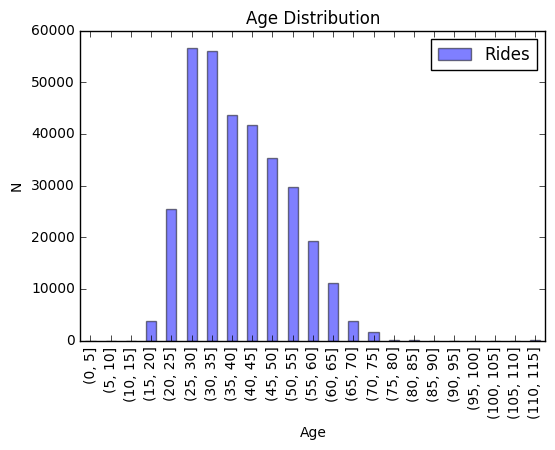

In [16]:
axA = df['age'].groupby(pd.cut(df['age'], bins)).\
    agg([count_nonzero]).plot(kind='bar', legend=False, alpha = 0.5)
axA.set_title('Age Distribution')
axA.set_ylabel('N')
axA.set_xlabel('Age')
#axA.set_xticks([])
axA.legend(['Rides'])

In [26]:
import scipy.stats as ss

## $H_0:$ Age distribution is drawn(or equal) from normal distribution.
## $H_a:$ Age distribution is not drawn(or not equal) from normal distribution.

## signifance level $\alpha$ = 0.05

In [15]:
np.random.seed(999)

In [24]:
ks = scipy.stats.kstest(df.age, 'norm', \
                        args=(df.age.mean(), df.age.std()))
print (ks)

KstestResult(statistic=0.088020366833220842, pvalue=0.0)


### With p-value = 0.0, we can rejet null hypothesis which is Age distribution is drawn from nomal distribution.

In [29]:
test_anderson = ss.anderson(df.age, dist='norm')
print (test_anderson)

AndersonResult(statistic=3256.2673628629418, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### With statistic value way much greater than critical values, we can rejet null hypothesis which is Age distribution is drawn from nomal distribution.

## $H_0:$ Age distribution is drawn(or equal) from exponential distribution.
## $H_a:$ Age distribution is not drawn(or not equal) from exponential distribution.

## signifance level $\alpha$ = 0.05

In [34]:
ks = scipy.stats.kstest(df.age, 'expon', \
                        args=(df.age.mean(), df.age.std()))
print (ks)

KstestResult(statistic=0.54129670216096759, pvalue=0.0)


### With p-value = 0.0, we can rejet null hypothesis which is Age distribution is drawn from exponential distribution.

In [33]:
test_anderson = ss.anderson(df.age, dist='expon')
print (test_anderson)

AndersonResult(statistic=76318.754837987304, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### With statistic value way much greater than critical values, we can rejet null hypothesis which is Age distribution is drawn from exponential distribution.